# This Notebook is to play with predicting numbers using the MNIST dataset. I will first utlize a decision tree, then random forest, then XGBoost

To assist with reinforcing code. I will not be utilizing any GenAI to create these algorithms. Just good old stack overflow and google machine.

I'm going to use sklearn in this example set.

In [37]:
#Install packages if needed, this will be offloaded to requirements.txt in the future.
#%pip install scikit-learn
#%pip install pandas
#%pip install matplotlib
%pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 11.2 MB/s eta 0:00:05
   -- ------------------------------------- 3.1/56.8 MB 9.7 MB/s eta 0:00:06
   --- ------------------------------------ 5.0/56.8 MB 9.4 MB/s eta 0:00:06
   ----- ---------------------------------- 7.6/56.8 MB 9.8 MB/s eta 0:00:06
   ------ --------------------------------- 9.4/56.8 MB 10.0 MB/s eta 0:00:05
   -------- ------------------------------- 12.1/56.8 MB 10.2 MB/s eta 0:00:05
   ---------- ----------------------------- 14.9/56.8 MB 10.4 MB/s eta 0:00:05
   ------------ --------------------------- 17.8/56.8 MB 10.9 MB/s eta 0:00:04
   -------------- ------------------------- 20.4/56.8 MB 11.1 MB/s eta 0:00:04
   ---------------- ----------------------- 22.8/56.8 MB 11.2 MB/s eta 0:00:04
   ------------------ --------------------- 25.7/56.8 MB 11.3 MB/s eta 0:00:03
   -------------------- ------------------- 28.8/56.8 MB 11.6 MB/s et

In [38]:
#Load sklearn packages that we will need
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

In [10]:
#Load the dataset
mnist = fetch_openml('mnist_784',version=1)

In [12]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, 
                                                    test_size=0.2, 
                                                    random_state=13)

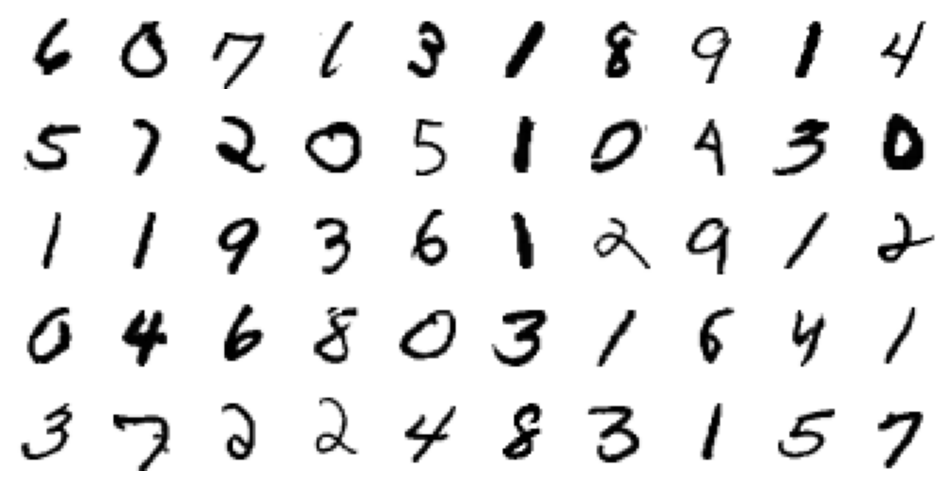

In [25]:
fig, ax = plt.subplots(5, 10, figsize=(12, 6))
ax = ax.ravel()   # flatten to 1D array of 50 axes

for k in range(50):
    ax[k].imshow(X_train.iloc[k].to_numpy().reshape(28, 28), cmap='binary')
    ax[k].axis('off')


In [33]:
#Create a random forset classifier
rf = RandomForestClassifier(n_estimators=500, random_state=13)

In [34]:
#Fit the model
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


array(['7', '3', '8', '6', '6', '0', '3', '4', '8', '5'], dtype=object)

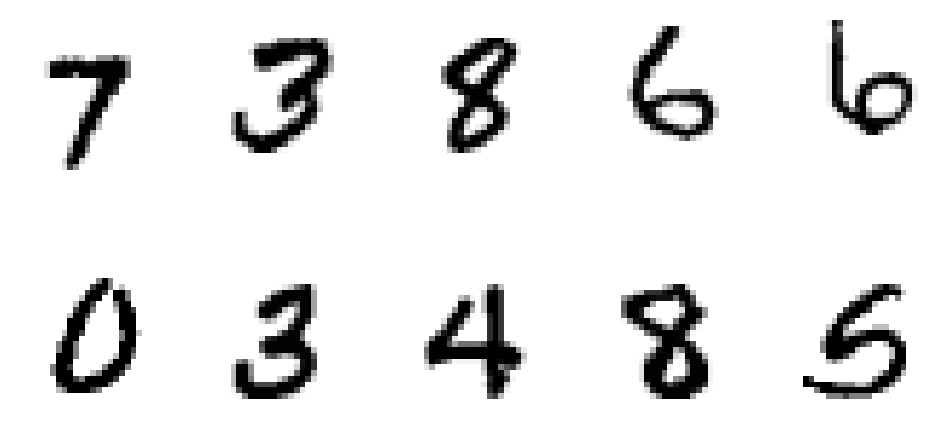

In [35]:
#Display 10 predictions
rf_y_pred = rf.predict(X_test)
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.ravel()   # flatten to 1D array of 50 axes

for k in range(10):
    ax[k].imshow(X_test.iloc[k].to_numpy().reshape(28, 28), cmap='binary')
    ax[k].axis('off')
rf_y_pred[:10]

In [36]:
#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy of the random forest model: {accuracy}")

Accuracy of the random forest model: 0.9705714285714285


# Now lets use XGBOOST!!!! BOOST THAT GRADIENT TO THE EXTREME!!!

In [ ]:
#Normalize data and flatten images

X, y = mnist.data, mnist.target

X = X/255.0
y = y.astype(int)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size = 0.2, random_state = 13)

In [41]:
#Create XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, eval_metric='merror', use_label_encoder=False)

In [42]:
#Train the model
xgb_model.fit(X_train2, y_train2)

c:\Users\rslas\OneDrive\Documents\Projects\leet_code\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:59:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'merror'


array([7, 3, 8, 6, 6, 0, 3, 4, 8, 5], dtype=int32)

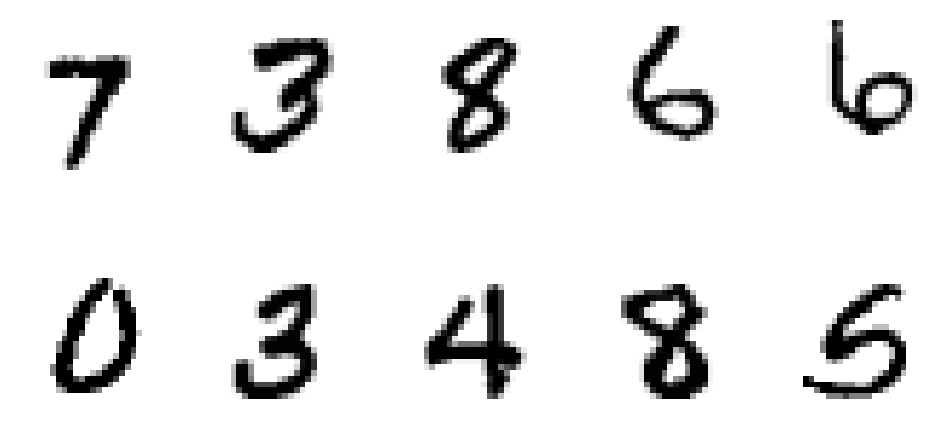

In [48]:
#Display 10 predictions
xgb_y_pred = xgb_model.predict(X_test2)
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.ravel()   # flatten to 1D array of 50 axes

for k in range(10):
    ax[k].imshow(X_test2.iloc[k].to_numpy().reshape(28, 28), cmap='binary')
    ax[k].axis('off')
xgb_y_pred[:10]

In [49]:
accuracy = accuracy_score(y_test2, xgb_y_pred)
print(f"XGBoost Accuracy on MNIST: {accuracy:.4f}")

XGBoost Accuracy on MNIST: 0.9754
